In [12]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_652090b280814202bf3cf1b60d340580 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yAIoa2u3FSR6H3ZLrN0lotpeczAabHKFncrsWlqav70y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_652090b280814202bf3cf1b60d340580.get_object(Bucket='smartcroprecommendationsystem-donotdelete-pr-hk53ire22vy0gl',Key='FinalData2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,73,57,44,20.879744,82.002744,6.502985,202.935536,rice
1,74,57,44,21.770462,80.319644,7.038096,226.655537,rice
2,92,41,38,23.004459,82.320763,7.840207,263.964248,rice
3,68,44,38,26.491096,80.158363,6.980401,242.864034,rice
4,66,36,40,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
#Importing Pandas and Numpy
import pandas as pd
import numpy as np

In [14]:
#To get info about the data set
df_data_1.info()
df_data_1.describe()

X = df_data_1[['N', 'P', 'K','humidity','temperature','ph','rainfall']]
y = df_data_1['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2000 non-null   int64  
 1   P            2000 non-null   int64  
 2   K            2000 non-null   int64  
 3   temperature  2000 non-null   float64
 4   humidity     2000 non-null   float64
 5   ph           2000 non-null   float64
 6   rainfall     2000 non-null   float64
 7   label        2000 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 125.1+ KB


In [15]:
#Import from sklearn.model_selection
from sklearn.model_selection import train_test_split   
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 36  0  0

[Text(211.0482421875, 209.6742857142857, 'X[6] <= 30.636\ngini = 0.95\nsamples = 1400\nvalue = [69, 77, 74, 67, 67, 64, 71, 69, 67, 70, 76, 72\n75, 66, 70, 65, 65, 68, 65, 83]'),
 Text(200.58574218750002, 194.14285714285714, 'gini = 0.0\nsamples = 70\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n70, 0, 0, 0, 0, 0]'),
 Text(221.5107421875, 194.14285714285714, 'X[2] <= 140.0\ngini = 0.947\nsamples = 1330\nvalue = [69, 77, 74, 67, 67, 64, 71, 69, 67, 70, 76, 72\n75, 66, 0, 65, 65, 68, 65, 83]'),
 Text(182.112890625, 178.61142857142858, 'X[3] <= 32.49\ngini = 0.941\nsamples = 1192\nvalue = [0, 77, 74, 67, 67, 64, 71, 0, 67, 70, 76, 72\n75, 66, 0, 65, 65, 68, 65, 83]'),
 Text(134.7046875, 163.07999999999998, 'X[2] <= 50.0\ngini = 0.5\nsamples = 137\nvalue = [0, 0, 0, 67, 0, 0, 0, 0, 0, 70, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(124.2421875, 147.54857142857142, 'gini = 0.0\nsamples = 70\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(145.1671875, 147.548

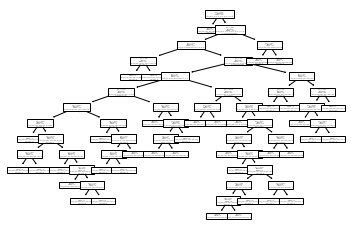

In [7]:
from sklearn import tree
tree.plot_tree(classifier)

In [8]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.98


In [9]:
#Plot it

In [10]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [11]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9916666666666667
